In [1]:
from sklearn.cluster import KMeans
import metrics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics

Using TensorFlow backend.
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:


def create_dataset(X, Y, **options):
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [6]:
path = glob.glob(r'C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\*.csv')

X_all = np.empty((1, 20, 38))
Y_all = np.empty((1,))

for i in range(0,2):
    print(path[i])
    
    CutIn = pd.read_csv(path[i], usecols=['Lat','Long','PositionInLane','Velocity','PosLgt1'
                                              ,'PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3'
                                              ,'PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1'
                                              ,'VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3'
                                              ,'AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5'
                                              ,'Angle1','Angle2','Angle3','Angle4','Angle5', 'CutIn'])
    CutIn.fillna(-1, inplace=True)

    
        
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['Lat','Long','PositionInLane','Velocity','PosLgt1'
                                              ,'PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3'
                                              ,'PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1'
                                              ,'VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3'
                                              ,'AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5'
                                              ,'Angle1','Angle2','Angle3','Angle4','Angle5']])


    dimof_output = 1
    dimof_input = X_train.shape[1]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0051.csv
(56795, 38) (56795,)
(56775, 20, 38) (56775,)
C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0052.csv
(56119, 38) (56119,)
(56099, 20, 38) (56099,)


In [7]:
np.count_nonzero(np.isnan(Y_all))

0

In [8]:
Y_all[0]=0
len(Y_all)

112875

In [43]:
sum(Y_all)

2803.0

In [58]:
x_all.shape

(112875, 760)

In [57]:
x_all.shape[-1]

760

In [10]:
x_all = X_all.reshape((X_all.shape[0], -1))
x_all

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.50494611, -0.79463215, -2.14485469, ..., -0.55893689,
        -0.27570121, -0.1226972 ],
       [-1.50494611, -0.79463215, -2.14485469, ..., -0.55893689,
        -0.27570121, -0.1226972 ],
       ...,
       [ 1.21589746,  2.15238351, -2.2350614 , ..., -0.56395817,
        -0.27837641, -0.12388866],
       [ 1.21589746,  2.15238351, -2.2350614 , ..., -0.56395817,
        -0.27837641, -0.12388866],
       [ 1.21589746,  2.15238351, -2.2350614 , ..., -0.56395817,
        -0.27837641, -0.12388866]])

In [11]:
x_all = x_all.astype(np.uint8)
x_all.nbytes

85785000

In [42]:
len(Y_all)

112875

In [12]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(x_all)

In [13]:
x_all = np.round(standardized_X , 4)

# K-means as baseline

In [14]:
from sklearn.cluster import KMeans


kmeans_under = KMeans(n_clusters=2, n_init=20 , n_jobs=4)   
y_pred_kmeans = kmeans_under.fit_predict(x_all)

In [15]:
y_pred_kmeans.shape

(112875,)

In [16]:
metrics.acc(Y_all, y_pred_kmeans)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.769328903654485

In [17]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_all, y_pred_kmeans)
conf_mat

array([[86814, 23258],
       [ 2779,    24]], dtype=int64)

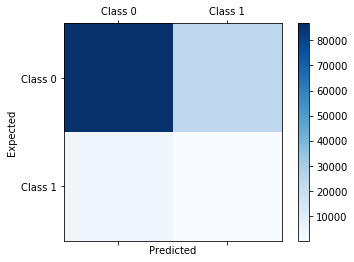

In [18]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat , cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [55]:
print(y_pred_kmeans)

[0 1 1 ... 1 1 1]


### Hyper parameters

In [19]:
def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x) 

    x = encoded
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [20]:
dims = [x_all.shape[-1], 500, 500, 1000, 64]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = r'C:\Users\YALAVI\Anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\tests\results'

In [21]:
autoencoder, encoder = autoencoder(dims, init=init)

In [24]:
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()

overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 20)

### Pre-train autoencoder

In [25]:


autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x_all, x_all, batch_size=batch_size, epochs=pretrain_epochs , callbacks=[overfitCallback] ) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')



Epoch 1/100
112875/112875 [==============================] - 52s 462us/step - loss: 0.6820
Epoch 2/100
112875/112875 [==============================] - 52s 465us/step - loss: 0.3891
Epoch 3/100
112875/112875 [==============================] - 56s 499us/step - loss: 0.2904
Epoch 4/100
112875/112875 [==============================] - 51s 448us/step - loss: 0.2372
Epoch 5/100
112875/112875 [==============================] - 50s 444us/step - loss: 0.2008
Epoch 6/100
112875/112875 [==============================] - 52s 464us/step - loss: 0.1773
Epoch 7/100
112875/112875 [==============================] - 51s 450us/step - loss: 0.1584
Epoch 8/100
112875/112875 [==============================] - 51s 453us/step - loss: 0.1457
Epoch 9/100
112875/112875 [==============================] - 54s 482us/step - loss: 0.1371
Epoch 10/100
112875/112875 [==============================] - 54s 482us/step - loss: 0.1285
Epoch 11/100
112875/112875 [==============================] - 53s 473us/step - loss: 0.12

112875/112875 [==============================] - 49s 438us/step - loss: 0.0407
Epoch 91/100
112875/112875 [==============================] - 50s 444us/step - loss: 0.0404
Epoch 92/100
112875/112875 [==============================] - 50s 442us/step - loss: 0.0415
Epoch 93/100
112875/112875 [==============================] - 50s 442us/step - loss: 0.0404
Epoch 94/100
112875/112875 [==============================] - 50s 442us/step - loss: 0.0401
Epoch 95/100
112875/112875 [==============================] - 50s 445us/step - loss: 0.0393
Epoch 96/100
112875/112875 [==============================] - 50s 441us/step - loss: 0.0389
Epoch 97/100
112875/112875 [==============================] - 50s 447us/step - loss: 0.0387
Epoch 98/100
112875/112875 [==============================] - 50s 443us/step - loss: 0.0384
Epoch 99/100
112875/112875 [==============================] - 50s 442us/step - loss: 0.0382
Epoch 100/100
112875/112875 [==============================] - 50s 440us/step - loss: 0.0380


In [26]:

autoencoder.save_weights(save_dir + '/ae_weights.h5')

 #### Load the pre-trained auto encoder weights

In [27]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

## Build clustering model

### ClusteringLayer

In [28]:
class ClusteringLayer(Layer):
 
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) 
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [29]:
n_clusters = 2
clustering_layer = ClusteringLayer(n_clusters , name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [31]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: initialize cluster centers using k-means

In [32]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x_all))

In [33]:
len(y_pred)

112875

In [34]:
sum(y_pred)

8998

In [35]:
y_pred_last = np.copy(y_pred)

In [36]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### Step 2: deep clustering


In [37]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [38]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x_all.shape[0])

In [39]:
tol = 0.001

### Start training

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.90621, nmi = 0.01179, ari = 0.06052  ; loss= 0


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.87644, nmi = 0.01011, ari = 0.05047  ; loss= 0.1628


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.82773, nmi = 0.01197, ari = 0.04613  ; loss= 0.02848


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.77834, nmi = 0.01063, ari = 0.03528  ; loss= 0.02998


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.73986, nmi = 0.00890, ari = 0.02695  ; loss= 0.00545


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 700: acc = 0.71532, nmi = 0.00803, ari = 0.02256  ; loss= 0.043


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 840: acc = 0.70489, nmi = 0.00773, ari = 0.02091  ; loss= 0.00681


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 980: acc = 0.70323, nmi = 0.00803, ari = 0.02112  ; loss= 0.00344


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1120: acc = 0.69989, nmi = 0.00818, ari = 0.02091  ; loss= 0.10138


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1260: acc = 0.69704, nmi = 0.00816, ari = 0.02054  ; loss= 0.01081


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1400: acc = 0.69267, nmi = 0.00797, ari = 0.01979  ; loss= 0.01105


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1540: acc = 0.68936, nmi = 0.00807, ari = 0.01953  ; loss= 0.00144


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1680: acc = 0.68315, nmi = 0.00792, ari = 0.01862  ; loss= 0.00356


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1820: acc = 0.68408, nmi = 0.00790, ari = 0.01872  ; loss= 0.03261


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1960: acc = 0.68307, nmi = 0.00793, ari = 0.01863  ; loss= 0.0143


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2100: acc = 0.68092, nmi = 0.00805, ari = 0.01851  ; loss= 0.0032


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2240: acc = 0.68020, nmi = 0.00799, ari = 0.01836  ; loss= 0.00841
delta_label  0.0009125138427464009 < tol  0.001
Reached tolerance threshold. Stopping training.


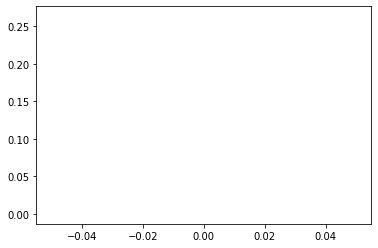

In [40]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x_all, verbose=0)
        p = target_distribution(q) 

        y_pred = q.argmax(1)
        if Y_all is not None:
            acc = np.round(metrics.acc(Y_all, y_pred), 5)
            nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
            ari = np.round(metrics.ari(Y_all, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x_all.shape[0])]
    loss = model.train_on_batch(x=x_all[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x_all.shape[0] else 0
    plt.plot(loss)

    
model.save_weights(save_dir + '/DEC_model_final.h5')

### Load the clustering model trained weights

In [44]:
model.load_weights(save_dir + '/DEC_model_final.h5')

### Final Evaluation

In [45]:
q = model.predict(x_all, verbose=0)
p = target_distribution(q)  

y_pred = q.argmax(1)
if Y_all is not None:
    acc = np.round(metrics.acc(Y_all, y_pred), 5)
    nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
    ari = np.round(metrics.ari(Y_all, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Acc = 0.68020, nmi = 0.00799, ari = 0.01836  ; loss= 0.00841


In [ ]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=1)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_all, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 15});
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

In [ ]:
confusion_matrix